## Data Cleaning del archivo `'ABT_CALIDAD_AIRE.csv'`

In [6]:
import dask.dataframe as dd
import seaborn as sns

In [3]:
df = dd.read_csv("data/ABT_CALIDAD_AIRE.csv",sep=',')
df.head()

id_pto_calidad nombre_estacion  ALTITUD tipo_estacion_id             fecha  \
0               4  Pza. de España      635               UT  01OCT17:00:00:00   
1               4  Pza. de España      635               UT  01OCT17:01:00:00   
2               4  Pza. de España      635               UT  01OCT17:02:00:00   
3               4  Pza. de España      635               UT  01OCT17:03:00:00   
4               4  Pza. de España      635               UT  01OCT17:04:00:00   

   Calidad_NO2  Pto_trafico2  Pto_trafico1  Pto_trafico4  Pto_trafico5  ...  \
0         77.0        3652.0        4316.0          4333          4336  ...   
1         34.0        3652.0        4316.0          4333          4336  ...   
2         26.0        3652.0        4316.0          4333          4336  ...   
3         18.0        3652.0        4316.0          4333          4336  ...   
4         12.0        3652.0        4316.0          4333          4336  ...   

   chance_of_rain  will_it_snow  chance_of_snow  vis_km  festivo  anyo  mes  \
0               0             0               0    10.0        0  2017   10   
1               0             0               0    10.0        0  2017   10   
2               0             0               0    10.0        0  2017   10   
3               0             0               0    10.0        0  2017   10   
4               0             0               0    10.0        0  2017   10   

   dia  hora  diasemana  
0    1     0          1  
1    1     1          1  
2    1     2          1  
3    1     3          1  
4    1     4          1  

[5 rows x 86 columns]

Para manipularlo es mucho más comodo porque es mas veloz en cuanto a ejecucción por hacerlo en paralelo

In [4]:
df.isnull().sum().compute()

id_pto_calidad      0
nombre_estacion     0
ALTITUD             0
tipo_estacion_id    0
fecha               0
                   ..
anyo                0
mes                 0
dia                 0
hora                0
diasemana           0
Length: 86, dtype: int64

In [5]:
columnas_nulos=[]
for i in df.columns:
    if df[i].isnull().sum().compute()>0:
        columnas_nulos.append(i)

Hacemos un `heatmap` de las columnas que contienen datos nulos

<AxesSubplot:>

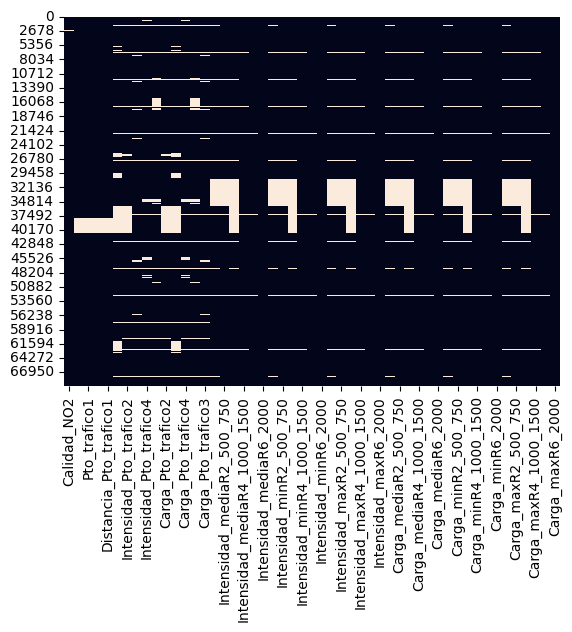

In [7]:
sns.heatmap(df[columnas_nulos].isnull().compute(),cbar=False)

In [9]:
for col in columnas_nulos:
    print(f"Columna {col} - {df[col].isnull().sum().compute()} nulos - Media {df[col].mean().compute()}")

Columna Calidad_NO2 - 314 nulos - Media 49.07984763443808
Columna Pto_trafico2 - 2880 nulos - Media 4860.044590281836
Columna Pto_trafico1 - 2880 nulos - Media 4953.346293882321
Columna Distancia_Pto_trafico2 - 2880 nulos - Media 246.23995493939833
Columna Distancia_Pto_trafico1 - 2880 nulos - Media 219.07531362369107
Columna Intensidad_Pto_trafico1 - 10187 nulos - Media 328.1421829255966
Columna Intensidad_Pto_trafico2 - 7176 nulos - Media 420.066108842446
Columna Intensidad_Pto_trafico3 - 2342 nulos - Media 548.1208338907226
Columna Intensidad_Pto_trafico4 - 2985 nulos - Media 509.72231351421726
Columna Intensidad_Pto_trafico5 - 4949 nulos - Media 505.81008653925676
Columna Carga_Pto_trafico2 - 7176 nulos - Media 19.623235113566587
Columna Carga_Pto_trafico1 - 10187 nulos - Media 20.000552433511555
Columna Carga_Pto_trafico4 - 2985 nulos - Media 24.12475613782337
Columna Carga_Pto_trafico5 - 4949 nulos - Media 24.82798325911262
Columna Carga_Pto_trafico3 - 2342 nulos - Media 17.83875